In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
planned_spend = pd.read_excel('toy_sales_data.xlsx', sheet_name=1)
display(planned_spend)
print(planned_spend.shape)

,month,tv_spend,digital_spend
0,2018-01-01,350000,215000
1,2018-02-01,950000,150000
2,2018-03-01,1350000,400000


(3, 3)


In [3]:
toy_sales = pd.read_excel('toy_sales_data.xlsx')
display(toy_sales)
print(toy_sales.shape)

,month,sales,tv_spend,digital_spend,trend,xmas
0,2016-01-01,3700000,600000.0,300000.00,1,0
1,2016-02-01,8900000,2880000.0,90000.00,2,0
2,2016-03-01,8200000,864000.0,427000.00,3,0
3,2016-04-01,5800000,259200.0,128100.00,4,0
4,2016-05-01,11000000,2077760.0,538430.00,5,0
5,2016-06-01,7700000,623328.0,161529.00,6,0
6,2016-07-01,10300000,2186998.4,48458.70,7,0
7,2016-08-01,7800000,656099.5,14537.61,8,0
8,2016-09-01,9500000,196829.9,804361.28,9,0
9,2016-10-01,10600000,1859049.0,241308.38,10,0


(24, 6)


In [4]:
toy_sales.dtypes

month            datetime64[ns]
sales                     int64
tv_spend                float64
digital_spend           float64
trend                     int64
xmas                      int64
dtype: object

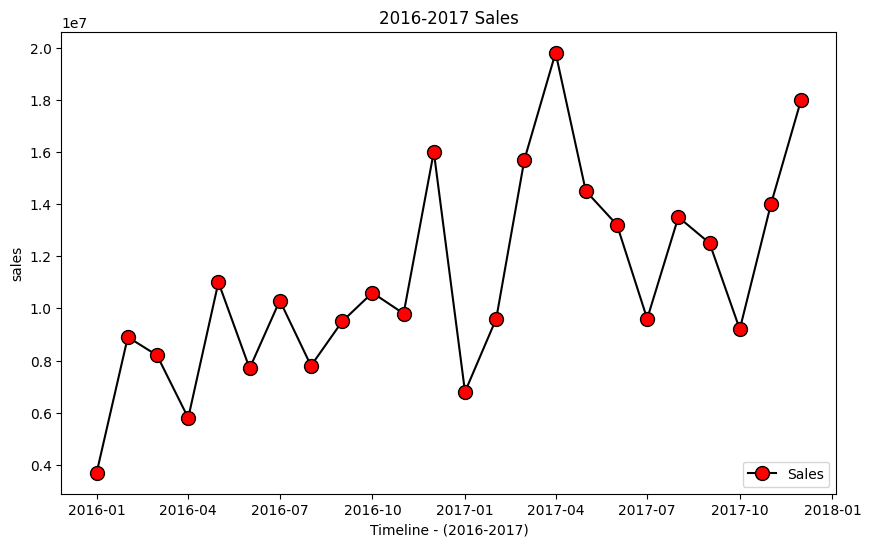

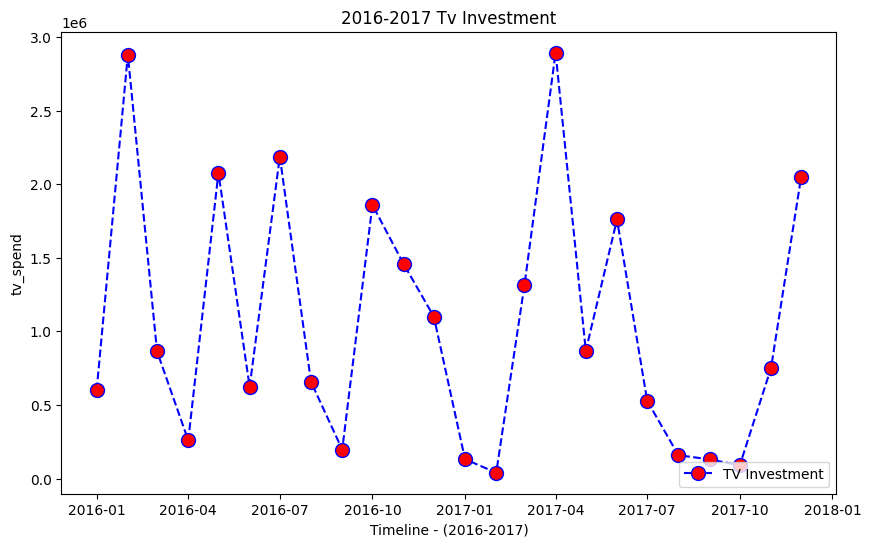

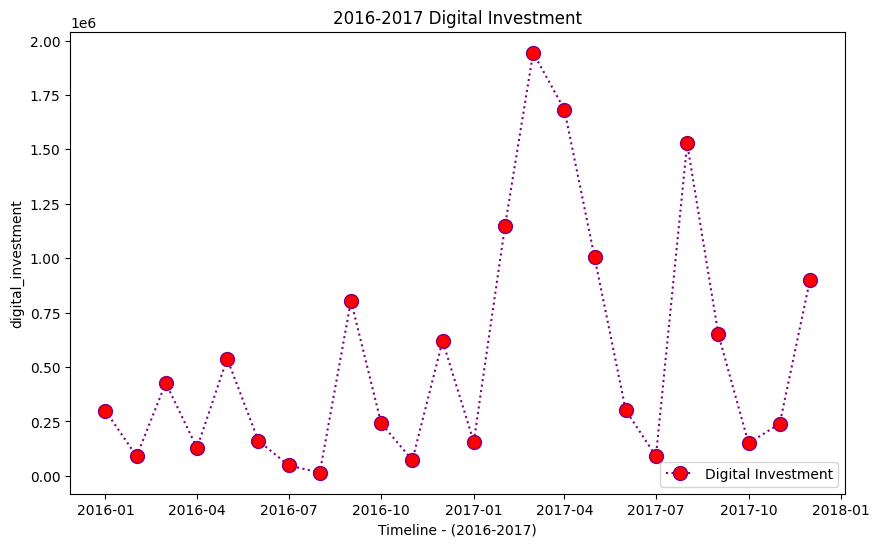

In [5]:
plt.figure(figsize=(10,6))
plt.plot(toy_sales['month'], toy_sales['sales'], linestyle='solid', color='black', marker='o', markerfacecolor='red', markersize=10, label='Sales')
plt.xlabel('Timeline - (2016-2017)')
plt.ylabel('sales')
plt.title('2016-2017 Sales')
plt.legend(loc='lower right')

plt.figure(figsize=(10,6))
plt.plot(toy_sales['month'], toy_sales['tv_spend'], linestyle='dashed', color='blue', marker='o', markerfacecolor='red', markersize=10, label='TV Investment')
plt.xlabel('Timeline - (2016-2017)')
plt.ylabel('tv_spend')
plt.title('2016-2017 Tv Investment')
plt.legend(loc='lower right')

plt.figure(figsize=(10,6))
plt.plot(toy_sales['month'], toy_sales['digital_spend'], linestyle='dotted', color='purple', marker='o', markerfacecolor='red', markersize=10, label='Digital Investment')
plt.xlabel('Timeline - (2016-2017)')
plt.ylabel('digital_investment')
plt.title('2016-2017 Digital Investment')
plt.legend(loc='lower right')

### Correlation Matrix and Heatmap:

In [6]:
# Selecting only Sales, Tv and Digital spend:
toy_sales_subset = toy_sales[['sales','tv_spend','digital_spend']]

# Correlation matrix:
correlation_matrix = toy_sales_subset.dropna().corr()
correlation_matrix

,sales,tv_spend,digital_spend
sales,1.000000,0.440686,0.664765
tv_spend,0.440686,1.000000,0.072059
digital_spend,0.664765,0.072059,1.000000


In [1]:
# List of correlation methods:
correlation_methods = ['pearson','spearman','kendall']

# Heat map of correlation matrix using all 3 types of correlation methods:
plt.figure(figsize=(36,8), dpi=100)
sns.set_theme(font_scale=2.2)

for j,i in enumerate(correlation_methods):    
    plt.subplot(1, len(correlation_methods), j+1)
    
    # Correlation matrix using all three correlation methods:
    correlation_matrix = toy_sales_subset.dropna().corr(method = i)
    sns.heatmap(correlation_matrix, cmap = sns.cm.rocket_r, annot=True, annot_kws={"size": 25})
    
    plt.title("{} Heat map".format(i), fontsize=25)

plt.show()
sns.reset_orig()

NameError: name 'plt' is not defined

### **Interpretations:**
    * From the above Heatmaps including different correlations we can see that there is a good correlation between Tv_spend and sales and also Digital_spend and sales

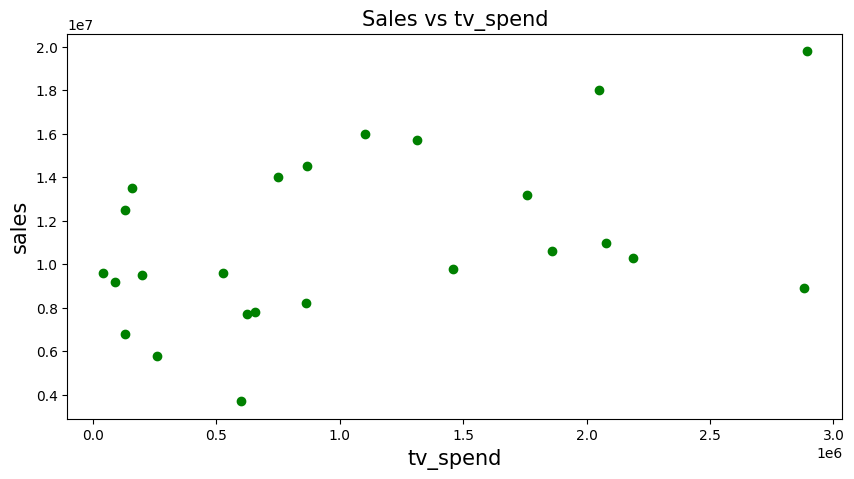

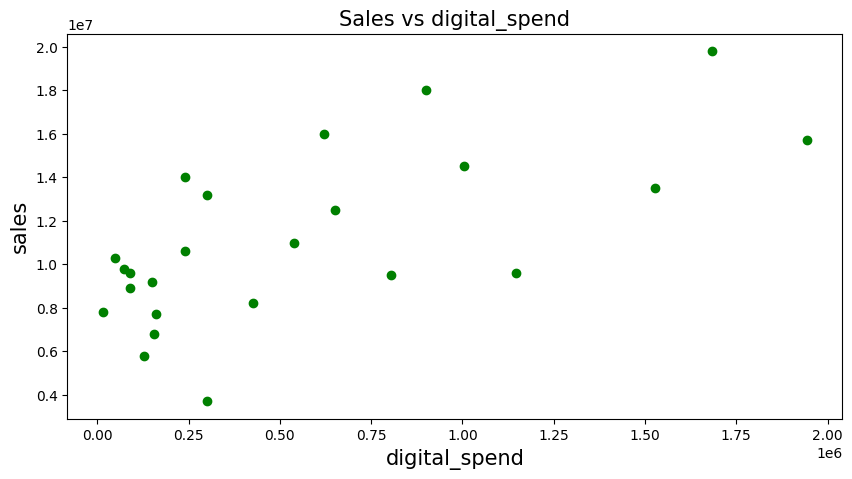

In [8]:
# drawing scatter plot:
plt.figure(figsize=(10,5), dpi=100)
plt.scatter(toy_sales['tv_spend'], toy_sales['sales'], color ="green")
plt.title('Sales vs tv_spend',fontsize=15)
plt.xlabel('tv_spend',fontsize=15)
plt.ylabel('sales',fontsize=15)
plt.show()

# drawing scatter plot:
plt.figure(figsize=(10,5), dpi=100)
plt.scatter(toy_sales['digital_spend'], toy_sales['sales'], color ="green")
plt.title('Sales vs digital_spend',fontsize=15)
plt.xlabel('digital_spend',fontsize=15)
plt.ylabel('sales',fontsize=15)
plt.show()

### **Interpretations:**
    * From the above scatter plots we can see that there is a linear relationship between Tv_spend and sales and also Digital_spend and sales

### Univariate analysis of Numeric variables

In [9]:
# Function to perform univariate analysis of the numeric coloumns by checking normality, skewness and kurtosis:
def univariate_analysis_numeric(df, col_name):
    
    # Taking only the column data:
    df_col =df[col_name]
    
    # Checking for Skewness and Kurtosis:
    df_col_skewness = round(df_col.skew(),2)
    df_col_kurtosis = round(df_col.kurtosis(),2)
    print('{} Skewness: {}'.format(col_name,df_col_skewness))
    print('{} Kurtosis: {}'.format(col_name,df_col_kurtosis))

    # Mean, Median and Standard Deviation:
    df_col_mean = round(df_col.mean(),2)
    df_col_median = round(df_col.median(),2)
    df_col_var = round(df_col.var(),2)
    df_col_std = round(df_col.std(),2)
    df_col_min_max = round(df_col.min(),2), round(df_col.max(),2)
    # This is one standard deviation on either sides of the mean value:
    one_std_range = round(df_col_mean - df_col_std,2), round(df_col_mean + df_col_std,2) 
    print('{} mean: {}, median: {}'.format(col_name, df_col_mean, df_col_median))
    print('{} standard deviation: {}, one_std_range: {}'.format(col_name, df_col_std, one_std_range))
    print('{} variance: {}'.format(col_name, df_col_var))
    print('{} Min and Max: {}'.format(col_name, df_col_min_max))
    
    # Sub-plots:
    fig, axes = plt.subplots(1,3,figsize=(20,5), dpi=100)
    
    # Normality check (visual) - KDE Plot:
    sns.kdeplot(ax=axes[0], x=df_col, fill=True)
    sns.scatterplot(ax=axes[0], x=[df_col_mean], y=[0], color='red', label='Mean')
    sns.scatterplot(ax=axes[0], x=[df_col_median], y=[0], color='green', label='Median')
    sns.lineplot(ax=axes[0], x=list(one_std_range), y=[0,0], color='black', label='std_range')
    axes[0].set_title('{} - KDE'.format(col_name))
    axes[0].set_xlabel('{}'.format(col_name))
    axes[0].set_ylabel('Density')
    
    # Normality check - QQ Plot:
    sm.qqplot(df_col, line='s', ax=axes[1])
    axes[1].set_title('{} - QQ Plot'.format(col_name))
    
    # Box plot to check for outliers in the data:
    sns.boxplot(ax=axes[2], x=df_col)
    axes[2].set_title('{} - Box plot'.format(col_name))
    axes[2].set_xlabel('{}'.format(col_name))
    
    plt.show()

tv_spend Skewness: 0.71
tv_spend Kurtosis: -0.58
tv_spend mean: 1061390.57, median: 807117.5
tv_spend standard deviation: 890596.1, one_std_range: (170794.47, 1951986.67)
tv_spend variance: 793161419079.18
tv_spend Min and Max: (39358.3, 2893542.2)


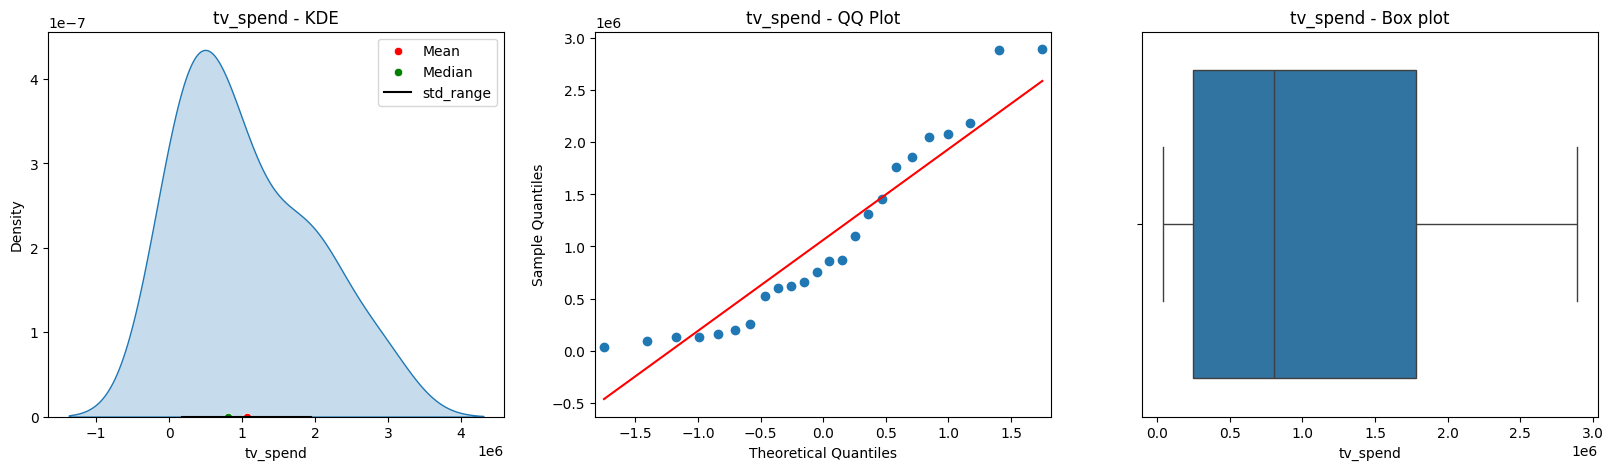

In [10]:
univariate_analysis_numeric(toy_sales, 'tv_spend')

* **Interpretations:**
    * The tv_spend data is slightly skewed towards right (positively skewed) as the skewness value is greater than +0.5
    * The kurtosis value is -0.58 which is less than 0 (playtickurtic) which means that data has fatter tail indicating less no.of outliers which can also be observed fromt he box and QQ plots
    * The data is almost normally distributed

digital_spend Skewness: 1.24
digital_spend Kurtosis: 0.65
digital_spend mean: 551750.84, median: 300745.16
digital_spend standard deviation: 556089.41, one_std_range: (-4338.57, 1107840.25)
digital_spend variance: 309235426369.28
digital_spend Min and Max: (14537.61, 1944086.38)


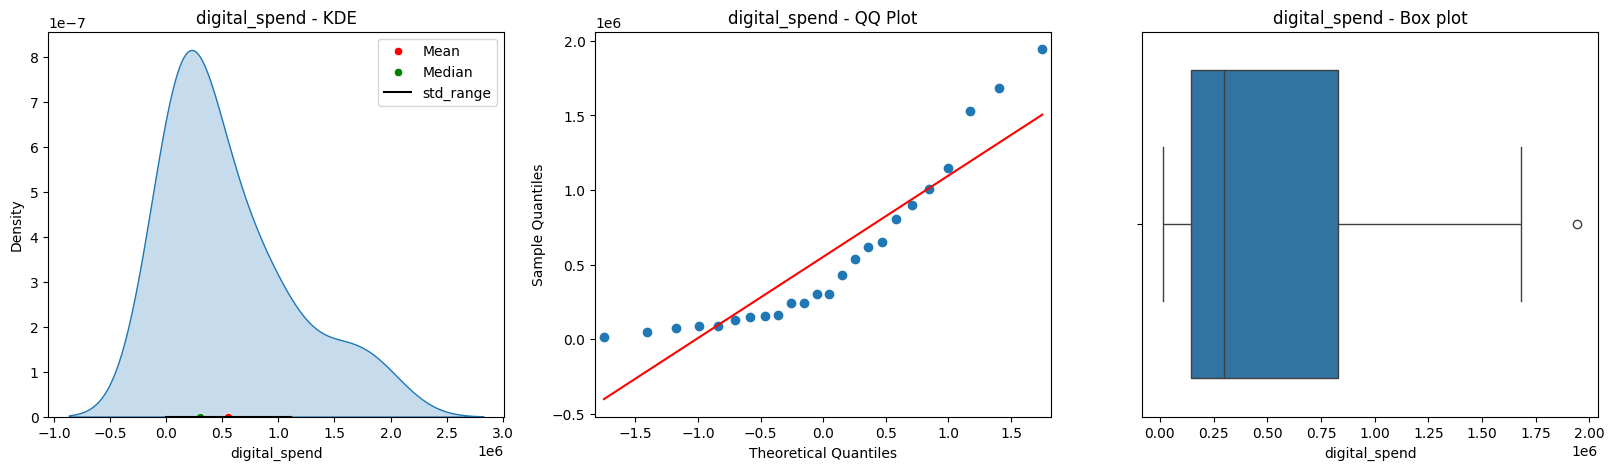

In [11]:
univariate_analysis_numeric(toy_sales, 'digital_spend')

* **Interpretations:**
    * The digital_spend data is slightly skewed towards right (positively skewed) as the skewness value is greater than +0.5
    * The kurtosis value is 0.65 which is greater than 0 (leptokurtic) which means that data has longer tail indicating more no.of outliers which can also be observed fromt he box and QQ plots
    * The data is almost normally distributed

sales Skewness: 0.44
sales Kurtosis: -0.07
sales mean: 11070854.17, median: 10050000.0
sales standard deviation: 3905706.6, one_std_range: (7165147.57, 14976560.77)
sales variance: 15254544032155.8
sales Min and Max: (3700000, 19800000)


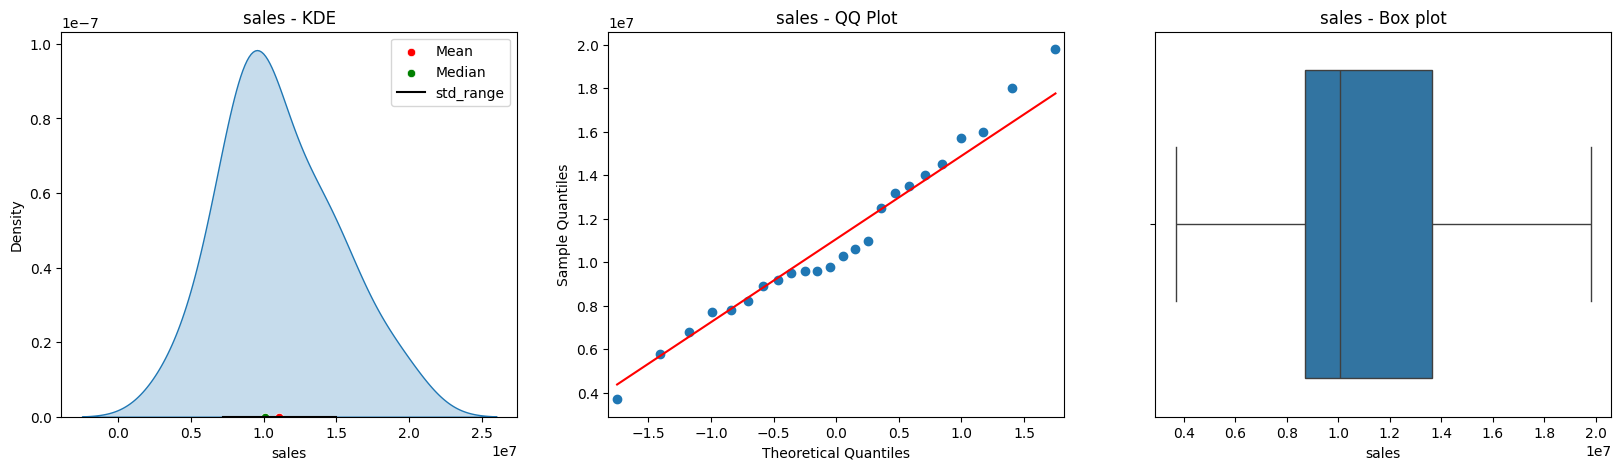

In [12]:
univariate_analysis_numeric(toy_sales, 'sales')

* **Interpretations:**
    * The Sales data is Normally distributed as the skewness value is between -0.5 and +0.5
    * The kurtosis value is -0.07 which is less than 0 (leptokurtic) but very close to zero which means that data has fatter tail indicating very less no.of outliers which can also be observed fromt he box and QQ plots
    * The data is Normally distributed

### Data Pre-processing

In [13]:
toy_sales = toy_sales.drop(['trend'], axis=1)
toy_sales

,month,sales,tv_spend,digital_spend,xmas
0,2016-01-01,3700000,600000.0,300000.00,0
1,2016-02-01,8900000,2880000.0,90000.00,0
2,2016-03-01,8200000,864000.0,427000.00,0
3,2016-04-01,5800000,259200.0,128100.00,0
4,2016-05-01,11000000,2077760.0,538430.00,0
5,2016-06-01,7700000,623328.0,161529.00,0
6,2016-07-01,10300000,2186998.4,48458.70,0
7,2016-08-01,7800000,656099.5,14537.61,0
8,2016-09-01,9500000,196829.9,804361.28,0
9,2016-10-01,10600000,1859049.0,241308.38,0


In [14]:
y = toy_sales['sales']
X = toy_sales.drop(['sales','month'], axis=1)

# Independent variables:
display(X.head())

# Dependent variable:
print(y[1:5])

,tv_spend,digital_spend,xmas
0,600000.0,300000.0,0
1,2880000.0,90000.0,0
2,864000.0,427000.0,0
3,259200.0,128100.0,0
4,2077760.0,538430.0,0


1     8900000
2     8200000
3     5800000
4    11000000
Name: sales, dtype: int64


In [15]:
# # Scaling the data to a common scale:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled

In [16]:
reg_model = LinearRegression()
reg_model.fit(X,y)

LinearRegression()

In [17]:
y_pred = reg_model.predict(X)
y_pred

array([ 8935412.1060497 , 11420451.52197326,  9862270.86051396,
        7705323.84540987, 12128020.80089867,  8385048.82752528,
       10220072.27470043,  7812664.24008666, 10469427.55389095,
       10549594.41616521,  9242582.70508186, 15705261.03578714,
        7636027.59263953, 11683556.12989316, 16932325.48315005,
       18169839.18617416, 12309460.41042791, 10657916.97076112,
        7944017.62354945, 13465445.96639828,  9719749.61176755,
        7547583.96480711,  8903207.90813632, 18295238.96421237])

In [18]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,3700000,8.935412e+06
1,8900000,1.142045e+07
2,8200000,9.862271e+06
3,5800000,7.705324e+06
4,11000000,1.212802e+07
5,7700000,8.385049e+06
6,10300000,1.022007e+07
7,7800000,7.812664e+06
8,9500000,1.046943e+07
9,10600000,1.054959e+07


In [19]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
adjusted_r2 = 1 - ( 1-reg_model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('Adjusted R2:', adjusted_r2)

Mean Absolute Error: 1547147.3271869563
Mean Square Error: 4291214505953.6597
Root Mean Square Error: 2071524.6814734454
Adjusted R2: 0.6624312469589653


In [ ]:
plt.figure(figsize=(11,5))
sns.regplot(x = y, y = y_pred, scatter_kws={'color':'red'})
plt.title('Regression model Fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Model Statistics:

In [29]:
# pair the feature names with the coefficients
print('\nY-Intercept: ', reg_model.intercept_)
print(list(zip(X, reg_model.coef_)))

print('\n-------------\n')

# Summary:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())


Y-Intercept:  6780917.981793828
[('tv_spend', 1.478957519593582), ('digital_spend', 4.223732041665743), ('xmas', 4676843.331241792)]

-------------

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     16.04
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.50e-05
Time:                        09:45:06   Log-Likelihood:                -383.11
No. Observations:                  24   AIC:                             774.2
Df Residuals:                      20   BIC:                             778.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|   

* **R² (R-squared):**
    * R² value of 0.71 means that 70.6% of the variance in the dependent variable (Sales) is explained by the three independent variables in the model
    * In other words, 70.6% of the change in sales can be predicted from the independent variables
    
* **Adjusted R²:**
    * Here, Adjusted R2 value of 0.662 tells that about 66.2% of the variance in the Toy Sales is explained by our three independent variables

* **Degrees of Freedom (df):**
    * This indicates the number of independent variables in the model which is 3 independent variables

* **F-Statistic (F):**
    * The higher F-statistic of 16.04 indicates that the model effectively explains the variation in the dependent variable which is toy sales in our case

* **Constant:**
    * This is the y-intercept and it represents the expected value of the dependent variable when all independent variables are zero. Here, it means that when tv_spend, digital_spend and xmas 1 are zero, the sales value is expected to be around 6780917.98
    * The p-value of y-intercept is 0 which is less than alpha value of 0.05 (alpha), showing that the intercept is statistically significant.
    * It means that the null hypothesis: the coefficient of (Constant) is zero in the population can rejected

* **tv_spend:**
    * It has the coefficient of 1.4790 which means if the value of the tv_spend changes by one unit then the value of the Sales changes by 1.48 units
    * The p-value is 0.013, which is less than 0.05 (Alpha value) indicating that it is statistically significant
    * It means that the null hypothesis that the coefficient of tv_spend is zero can be rejected

* **digital_spend:**
    * It has the coefficient of 4.2237 which means if the value of the digital_spend changes by one unit then the value of the Sales changes by 4.22 units. The p-value is 0 which is less than 0.05 (Alpha value) indicating that it is statistically significant
    * It means the null hypothesis that the coefficient of digital_spend is zero can be rejected

* **xmas 1:**
     * The p-value is 0.013 which is less than 0.05 (Alpha value) indicating that it is statistically significant
     * It the null hypothesis that the coefficient of xmas 1 is zero can be rejected

### Residual analysis:

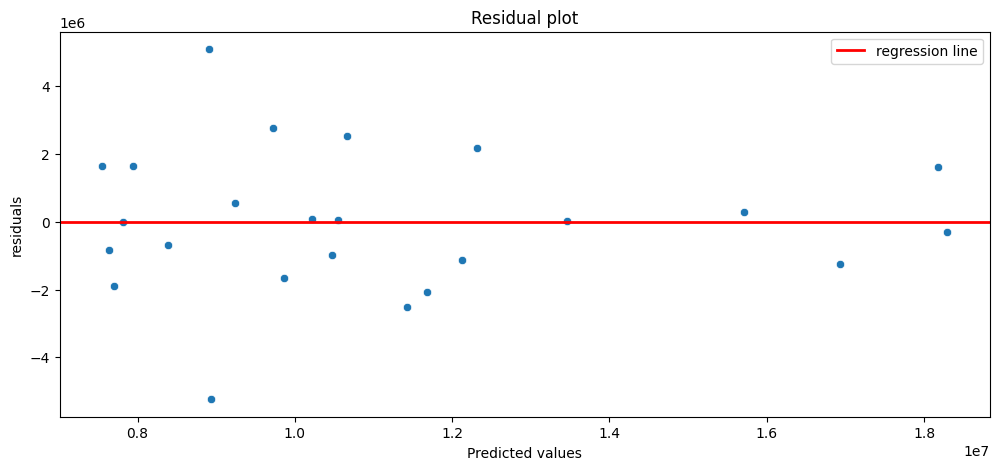

In [21]:
# create a DataFrame of predicted values and residuals
df = pd.DataFrame()
df["predicted"] = est.predict(X2)
df["residuals"] = est.resid

plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x="predicted", y="residuals")
plt.axhline(y=0, color='red', linewidth=2, label='regression line')
plt.xlabel('Predicted values')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend(loc='best')
plt.show()


* **Interpretations:**
    * According to the Residual plot there is no pattern for the residuals. 
    * Although it might look very slightly that there might be some pattern, the variance among the residuals seems largely constant atleast for this size of the dataset. Hence we can conclude that there is constant variance among residuals

### Distribution of residuals:

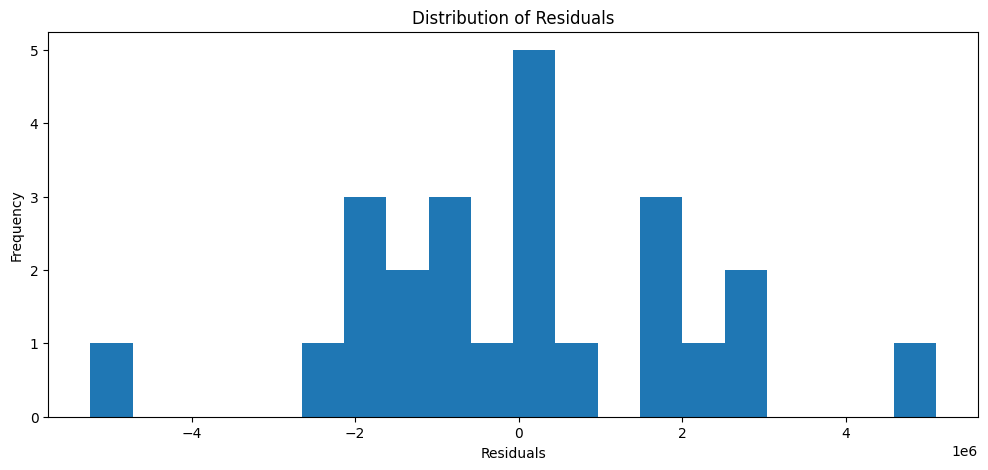

In [22]:
# Plotting the distribution of Residuals:
plt.figure(figsize=(12,5))
plt.hist(df["residuals"], bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

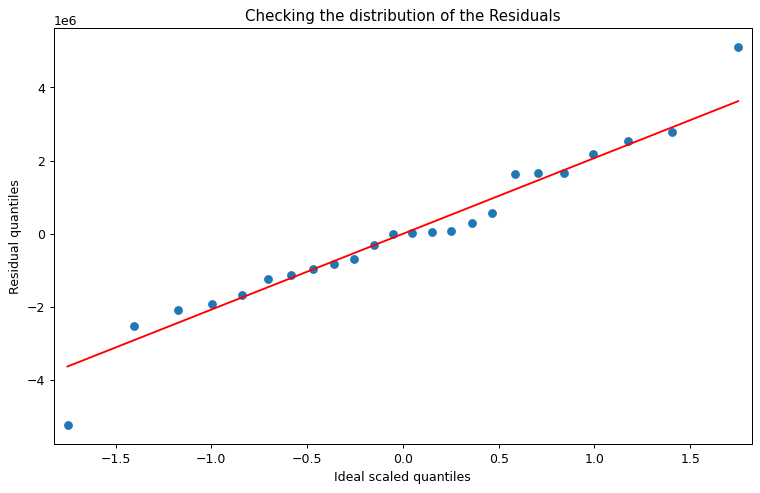

In [23]:
## QQ plot is used to check if the data is distributed normally or not:
fig, ax = plt.subplots(figsize=(10,6), dpi=90)
sm.qqplot(df["residuals"], line='s', ax=ax)
plt.xlabel('Ideal scaled quantiles')
plt.ylabel('Residual quantiles')
plt.title('Checking the distribution of the Residuals')
plt.show()

* **Interpretations:**
    * We cannot determine if the residuals are normally distributed or not from the histogram clearly because of the sparsity of the dataset
    * But from the QQ-plot we can clearly see that most of the residuals are along the line indicating that the residuals are normally distributed

### Checking for Multi-collinearity:

In [24]:
# Calculating VIF for every independent feature (It only works for the non-categorical columns):
# VIF is not calculated for the target feature

vif_df = pd.DataFrame()
vif_df['features'] = X.columns
vif_df['VIF'] = [vif(X.values,i) for i in range(len(X.columns))]

vif_df

,features,VIF
0,tv_spend,1.584742
1,digital_spend,1.534064
2,xmas,1.138988


* **Interpretations:**
    * We can see that VIF of all the independent variables is less than 5 which means there is no presence of Multi-collinearity and this is a good thing for the regression model

### Calculating ROI of TV spend:

In [25]:
toy_sales['ROI'] = ((toy_sales['sales'] - toy_sales['tv_spend']) / toy_sales['tv_spend']) * 100
toy_sales

,month,sales,tv_spend,digital_spend,xmas,ROI
0,2016-01-01,3700000,600000.0,300000.00,0,516.666667
1,2016-02-01,8900000,2880000.0,90000.00,0,209.027778
2,2016-03-01,8200000,864000.0,427000.00,0,849.074074
3,2016-04-01,5800000,259200.0,128100.00,0,2137.654321
4,2016-05-01,11000000,2077760.0,538430.00,0,429.416294
5,2016-06-01,7700000,623328.0,161529.00,0,1135.304687
6,2016-07-01,10300000,2186998.4,48458.70,0,370.965137
7,2016-08-01,7800000,656099.5,14537.61,0,1088.844070
8,2016-09-01,9500000,196829.9,804361.28,0,4726.502478
9,2016-10-01,10600000,1859049.0,241308.38,0,470.184003


### Predictions for Planned Spend 2018:

In [26]:
planned_spend['xmas'] = [0,0,0]
planned_spend

,month,tv_spend,digital_spend,xmas
0,2018-01-01,350000,215000,0
1,2018-02-01,950000,150000,0
2,2018-03-01,1350000,400000,0


In [27]:
planned_spend_X = planned_spend[['tv_spend','digital_spend','xmas']]

y_pred_planned = reg_model.predict(planned_spend_X)
y_pred_planned

array([ 8206655.50260972,  8819487.43165759, 10467003.44991146])

In [28]:
planned_spend['sales'] = y_pred_planned
planned_spend

,month,tv_spend,digital_spend,xmas,sales
0,2018-01-01,350000,215000,0,8.206656e+06
1,2018-02-01,950000,150000,0,8.819487e+06
2,2018-03-01,1350000,400000,0,1.046700e+07
